## Tensorflow Abstraction 

1.TF Learn \
2.keras \
3.TF-Slim \
4.Layers \
5.Estimator API \
ETC

Many of these Abstraction reside in Tensorflow's tf.contrib Section.\

We will mainly focusing on Abstraction :
* Estimator API
* Keras
* Layers

We will focus on understanding how to build these abstractions to build deep densely connected neural networks.Using these abstractions makes it easy to stack layers on top of each other for simpler task

# Deep Nets with TF Abstractions

Let's explore a few of the various abstractions that TensorFlow offers. You can check out the tf.contrib documentation for more options.

## Dataset

To compare these various abstractions we'll use a dataset easily available from the SciKit Learn library. The data is comprised of the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of wine. We will use the various TF Abstractions to classify the wine to one of the 3 possible labels.

First let's show you how to get the data:

In [1]:
from sklearn.datasets import load_wine

wine_data = load_wine()

## Bunch is special type of dictionary file
type(wine_data)

sklearn.utils.Bunch

In [2]:
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
# Extract Features and Labels
feat_data = wine_data['data']
labels = wine_data['target']

In [7]:
print(feat_data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [8]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feat_data,
                                                    labels,
                                                    test_size=0.3,
                                                   random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(124, 13)
(124,)
(54, 13)
(54,)


### Scale Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)


## ABSTRACTIONS

### Estimator API - Classification Problem for Wine Dataset

In [11]:
import tensorflow as tf
from tensorflow import estimator

In [12]:
## Step 1 - Create Feature Columns
feat_cols = [tf.feature_column.numeric_column('x',shape=[13])]

In [13]:
## Step 2 - Create Model
deep_model = estimator.DNNClassifier(hidden_units=[13,13,13],
                            feature_columns=feat_cols,
                            n_classes=3,
                            optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01) )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LUCKY_~1\\AppData\\Local\\Temp\\tmpb5bpdwe7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023D9D9E3278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
## Step 3 - Create Input Function
input_fn = estimator.inputs.numpy_input_fn(x={'x':scaled_x_train},y=y_train,shuffle=True,batch_size=10,num_epochs=5)

In [15]:
## Step 4 - Train with above input_func
deep_model.train(input_fn=input_fn,steps=500)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\LUCKY_~1\AppData\Local\Temp\tmpb5bpdwe7\model.ckpt.
INFO:tensorflow:loss = 11.84178

In [17]:
## Step 5 - Evaluate Above Trained Model 
input_fn_eval = estimator.inputs.numpy_input_fn(x={'x':scaled_x_test},y=y_test,shuffle=False,batch_size=10,num_epochs=1)
eval_metrics = deep_model.evaluate(input_fn=input_fn_eval)
eval_metrics

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-26T12:01:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpb5bpdwe7\model.ckpt-62
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-26-12:01:03
INFO:tensorflow:Saving dict for global step 62: accuracy = 0.8518519, average_loss = 0.568595, global_step = 62, loss = 5.117355
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 62: C:\Users\LUCKY_~1\AppData\Local\Temp\tmpb5bpdwe7\model.ckpt-62


{'accuracy': 0.8518519,
 'average_loss': 0.568595,
 'loss': 5.117355,
 'global_step': 62}

In [18]:
## Step 6 - Test on New Data - For Instance we will test on x_test
input_fn_pred = estimator.inputs.numpy_input_fn(x={'x':scaled_x_test},shuffle=False)
preds = list(deep_model.predict(input_fn=input_fn_eval))
preds

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LUCKY_~1\AppData\Local\Temp\tmpb5bpdwe7\model.ckpt-62
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([ 1.0300803,  0.5436209, -0.9957862], dtype=float32),
  'probabilities': array([0.5725151 , 0.35198185, 0.07550302], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1, 2]),
  'all_classes': array([b'0', b'1', b'2'], dtype=object)},
 {'logits': array([ 1.3683858 ,  0.80075556, -1.2656945 ], dtype=float32),
  'probabilities': array([0.6102577 , 0.34593505, 0.04380732], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1, 2]),
  'all_classes': array([b'0', b'1', b'2'], dtype=object)},
 {'logits': array([-1.2293239, -0.726871 ,  0.5375495], dtype=float32),
  'probabilities': array([0.1175738 , 0.19432247, 0.68810374], dtype=float32),
  'class_ids': array([2], dtype=int64),
  'classes': array([b'2'], dtype=object),
  'all_class_ids': array([0, 1, 2]),
  'all_classes': array([b'0', b'1', b'2'], dtype=object)},
 {'logits'

In [19]:
predictions = [p['class_ids'][0] for p in preds]
predictions

[0,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0]

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.64      0.78        22
           2       0.87      1.00      0.93        13

    accuracy                           0.85        54
   macro avg       0.88      0.88      0.86        54
weighted avg       0.88      0.85      0.84        54



----

## ABSTRACTIONS

### Keras API

In [21]:
import tensorflow as tf
from tensorflow.contrib.keras import models

### Import Data , Train Test Split , Scaled Data 

In [22]:
from sklearn.datasets import load_wine

wine_data = load_wine()
feat_data = wine_data['data']
labels = wine_data['target']

### Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat_data,
                                                    labels,
                                                    test_size=0.3,
                                                   random_state=101)

### Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)


In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(124, 13)
(124,)
(54, 13)
(54,)


### Tensorflow Keras


In [24]:
dnn_keras_model = models.Sequential()

## Add Layers to Model

from tensorflow.contrib.keras import layers

## Input Layer

### input_dim - No of Features
dnn_keras_model.add(layers.Dense(units=13,input_dim=13,activation='relu'))

## Hidden Layer
dnn_keras_model.add(layers.Dense(units=13,activation='relu'))
dnn_keras_model.add(layers.Dense(units=13,activation='relu'))

## Output Layer
dnn_keras_model.add(layers.Dense(units=3,activation='softmax'))

### Compile Model

In [25]:
### If data is not one hot encoded use sparse_Categorical_crossentropy
### If data is one hot encoded use categorical_cross_entropy
dnn_keras_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [27]:
dnn_keras_model.fit(scaled_x_train,y_train,epochs=50)

Train on 124 samples
Epoch 1/50
124/124 [==============================] - 1s 4ms/sample - loss: 1.0675 - acc: 0.4677
Epoch 2/50
124/124 [==============================] - 0s 893us/sample - loss: 1.0532 - acc: 0.5968
Epoch 3/50
124/124 [==============================] - 0s 740us/sample - loss: 1.0399 - acc: 0.6129
Epoch 4/50
124/124 [==============================] - 0s 619us/sample - loss: 1.0278 - acc: 0.6452
Epoch 5/50
124/124 [==============================] - 0s 371us/sample - loss: 1.0161 - acc: 0.7097
Epoch 6/50
124/124 [==============================] - 0s 478us/sample - loss: 1.0040 - acc: 0.6855
Epoch 7/50
124/124 [==============================] - 0s 314us/sample - loss: 0.9900 - acc: 0.6694
Epoch 8/50
124/124 [==============================] - 0s 412us/sample - loss: 0.9755 - acc: 0.6452
Epoch 9/50
124/124 [==============================] - 0s 387us/sample - loss: 0.9606 - acc: 0.6694
Epoch 10/50
124/124 [==============================] - 0s 492us/sample - loss: 0.9444 - ac

### Predictions for X_test

In [28]:
predictions = dnn_keras_model.predict_classes(scaled_x_test)

In [29]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



---

## ABSTRACTIONS 

### Layers API

https://www.tensorflow.org/tutorials/layers

### Formatting Data

In [30]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Import Data
wine_data = load_wine()
feat_data = wine_data['data']
labels = wine_data['target']

### Train Test Split
X_train, X_test, y_train, y_test = train_test_split(feat_data,
                                                    labels,
                                                    test_size=0.3,
                                                   random_state=101)

### Scale Data
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# ONE HOT ENCODED
onehot_y_train = pd.get_dummies(y_train).as_matrix()
one_hot_y_test = pd.get_dummies(y_test).as_matrix()

C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [31]:
onehot_y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0,

### Parameters


In [37]:
num_feat = 13
num_hidden1 = 13
num_hidden2 = 13
num_outputs = 3
learning_rate = 0.01

import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

### Placeholder


In [42]:
num_feat

13

In [38]:
X = tf.placeholder(tf.float32,shape=[None,num_feat])
y_true = tf.placeholder(tf.float32,shape=[None,3])   

### Activation Function

In [39]:
actf = tf.nn.relu

### Create Layers

In [40]:
hidden1 = fully_connected(X,num_hidden1,activation_fn=actf)
hidden2 = fully_connected(hidden1,num_hidden2,activation_fn=actf)
output = fully_connected(hidden2,num_outputs)

### Loss Function , Optimizer , Session

In [43]:
### Loss Function
loss = tf.losses.softmax_cross_entropy(onehot_labels=y_true, logits=output)

### Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

### Session

training_steps = 1000
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(training_steps):
        sess.run(train,feed_dict={X:scaled_x_train,y_true:onehot_y_train})
        
    # Get Predictions
    logits = output.eval(feed_dict={X:scaled_x_test})
    
    preds = tf.argmax(logits,axis=1)
    
    results = preds.eval()

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(results,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



----

### Tensorboard

Allows you to visualize complex Graphs in Organized Manner

In [1]:
import tensorflow as tf

In [2]:
# Build Simple Graph Session
a = tf.add(1,2)
b = tf.add(3,4)
c = tf.multiply(a,b)

In [3]:
with tf.Session() as sess:
    
    print(sess.run(c))

21


In [4]:
# Here we can directly interpret it that how we got 21 Ans
# If we have complex calculation we cannot interpret ans 
# We can visualize that Graph via Tensorboard

with tf.Session() as sess:
    
    writer = tf.summary.FileWriter('tensorboard_output',sess.graph)
    print(sess.run(c))
    writer.close() 

21


#### Now you need to run the file stored in 'tensorboard_output' with cmd

1.cd to the Path where the 'tensorboard_output' is located
2.Run Following command

    tensorboard --logdir="./tensorboard_output"
    
    or
    
    tensorboard --logdir="./tensorboard_output" --host localhost --port 8088
    
3.Copy the Path and Run it on Browser

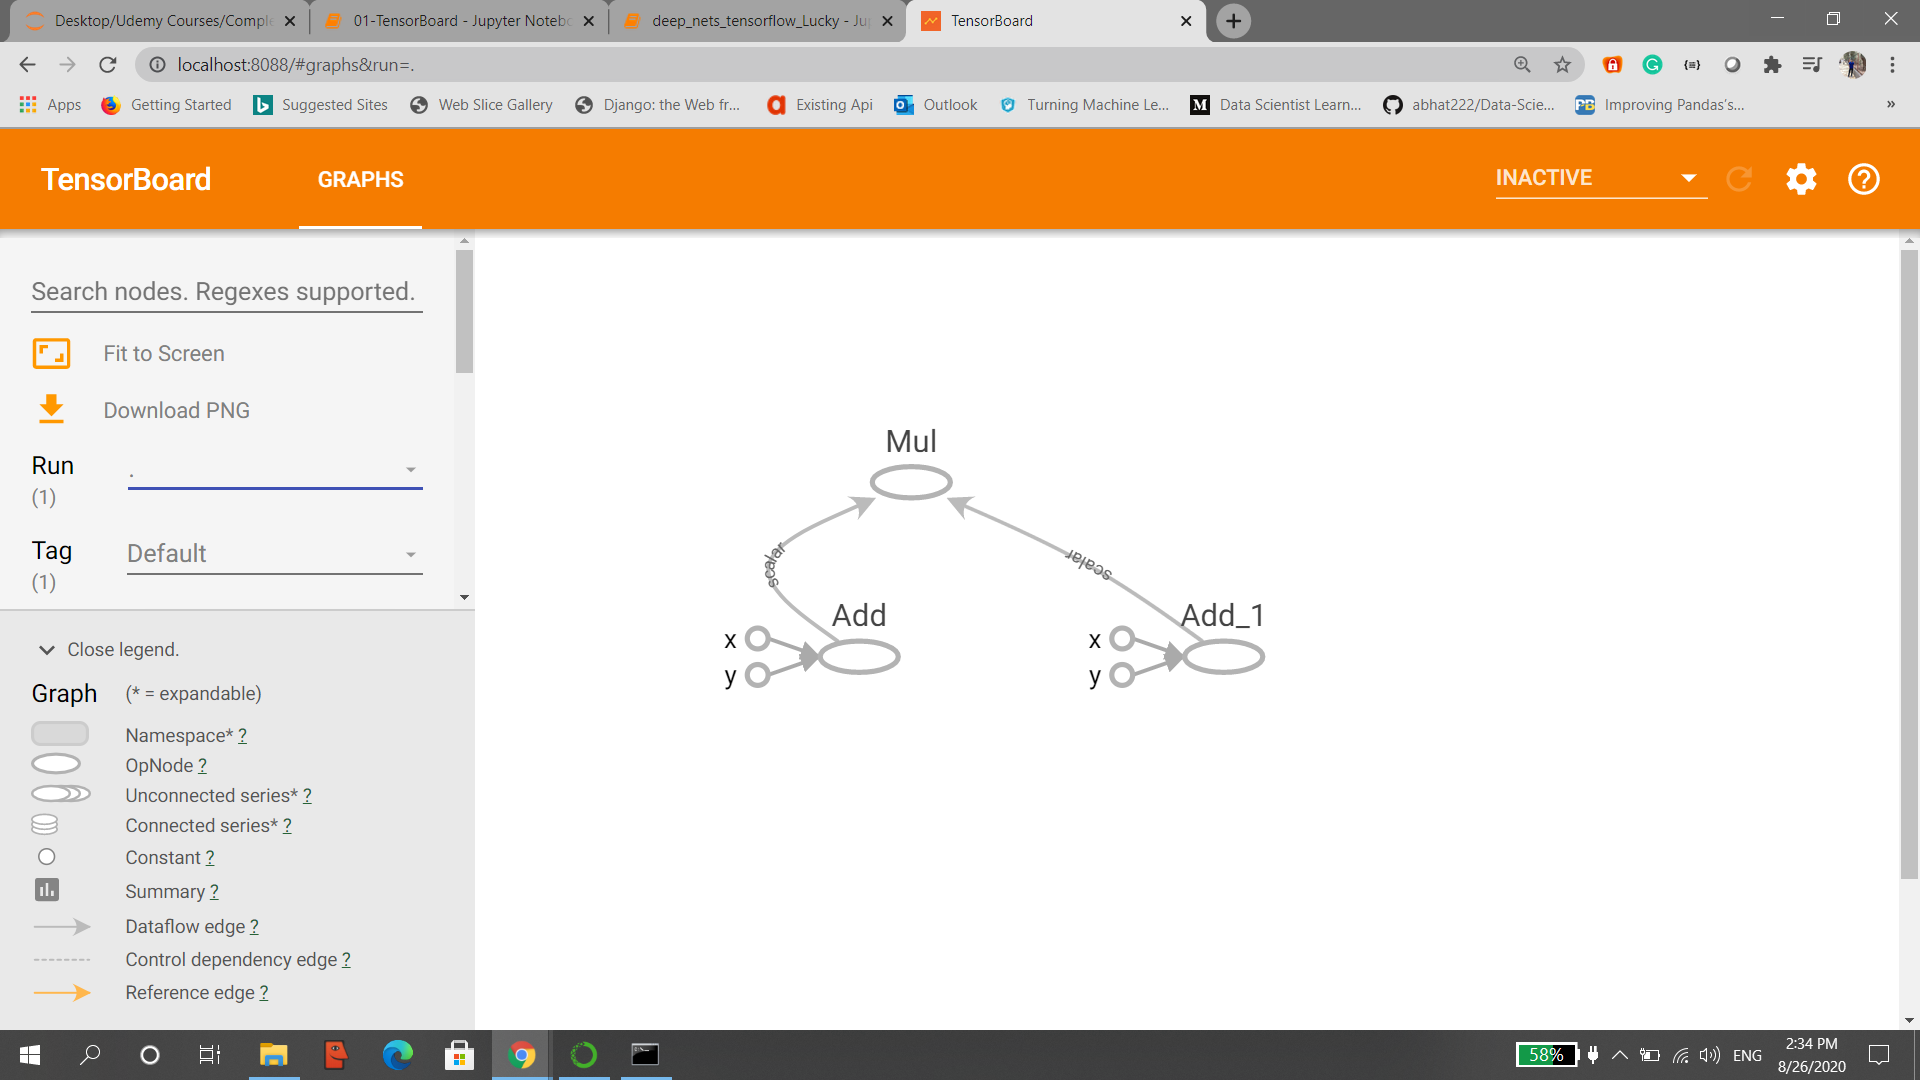

In [5]:
### Adding names to the nodes

a = tf.add(1,2,name="First_add")
b = tf.add(3,4,name="Second_add")
c = tf.multiply(a,b,name='final_result')

## Run Session Again
# Here we can directly interpret it that how we got 21 Ans
# If we have complex calculation we cannot interpret ans 
# We can visualize that Graph via Tensorboard

with tf.Session() as sess:
    
    writer = tf.summary.FileWriter('tensorboard_output',sess.graph)
    print(sess.run(c))
    writer.close() 

21


### Output of New Graph and Previous 

If you only want Newest Graph delete previous events from the tensor_board_output folder

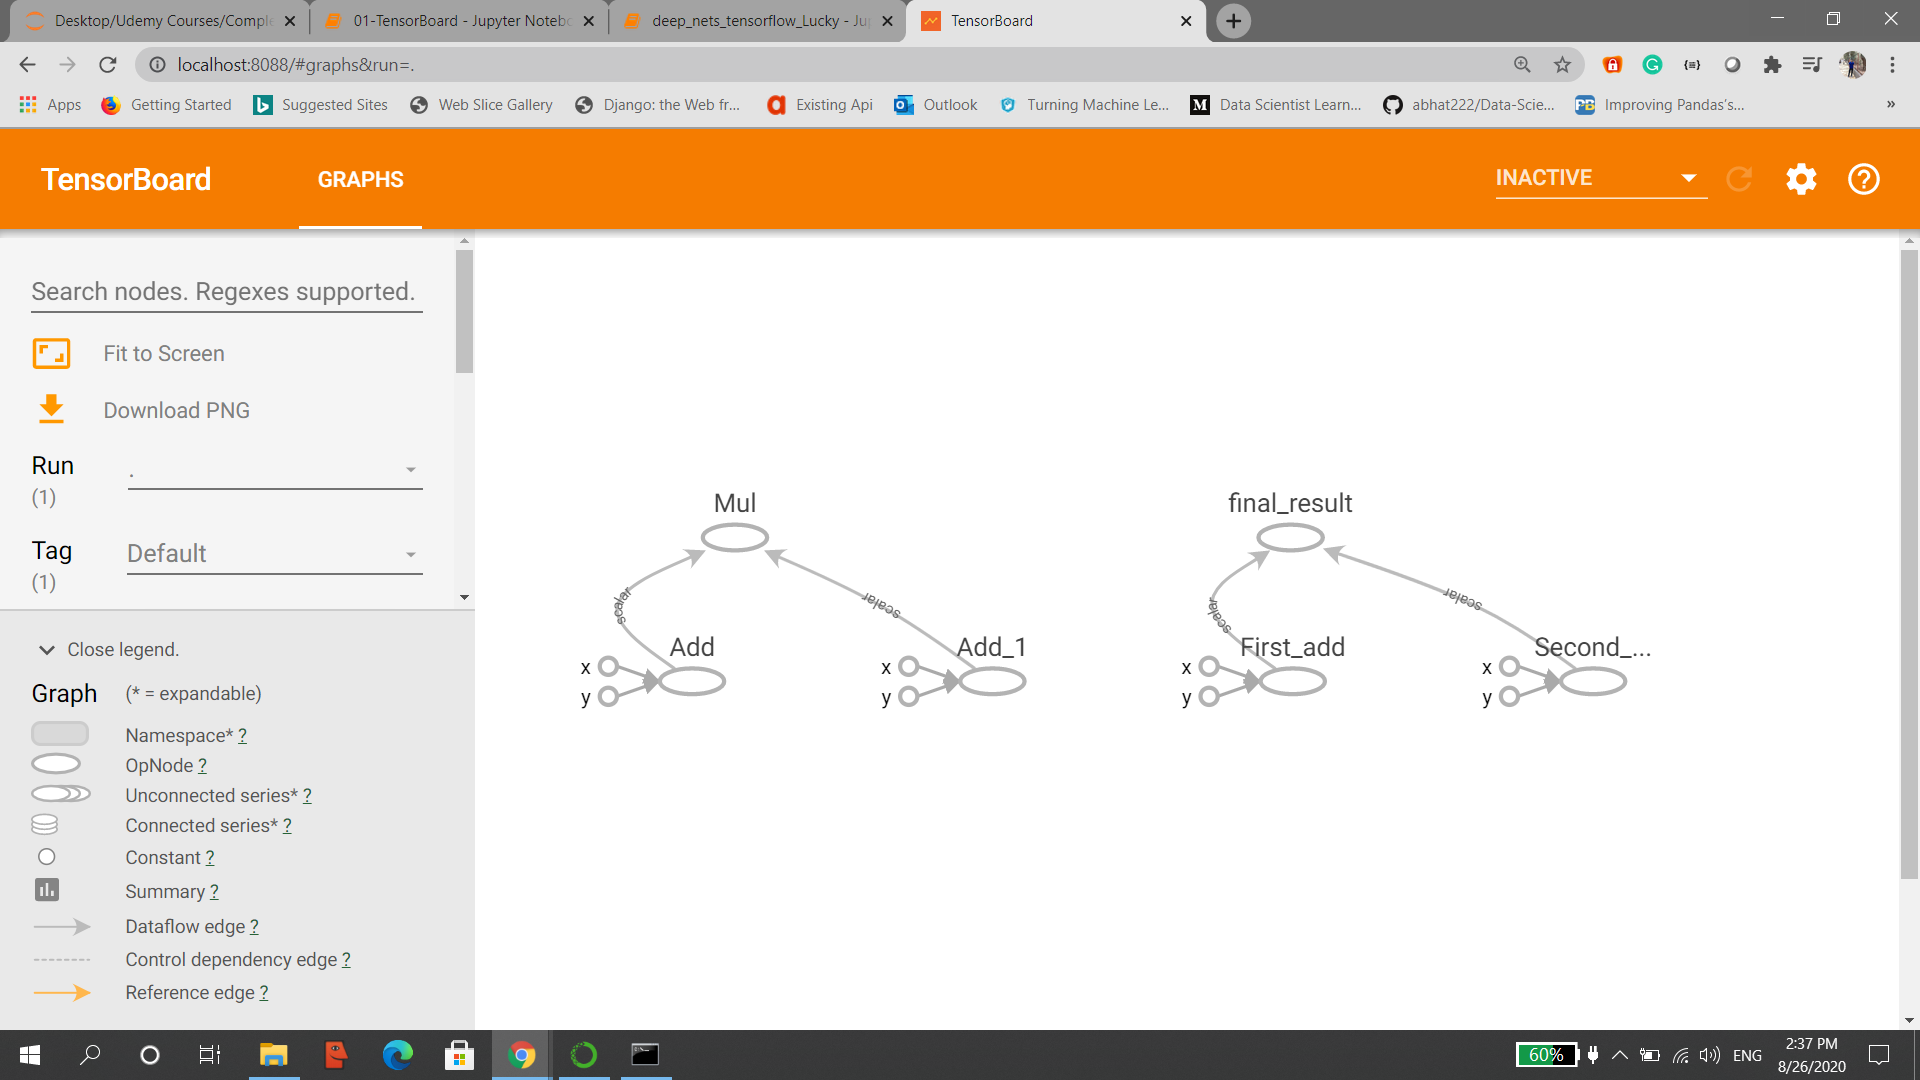

## Add Scope in Graph



In [7]:
### Adding Scopes

#### Will look like Grey Box in Tensorflow
with tf.name_scope("OPERATION_A"):
    a = tf.add(1,2,name="First_add")
    a1 = tf.add(100,200,name="a_add")
    a2 = tf.multiply(a,a1)

with tf.name_scope('OPERATION_B'):
    b = tf.add(3,4,name="Second_add")
    b1 = tf.add(300,400,name="b_add")
    b2 = tf.multiply(b,b1)

c = tf.multiply(a2,b2,name='final_result')

## Run Session Again
# Here we can directly interpret it that how we got 21 Ans
# If we have complex calculation we cannot interpret ans 
# We can visualize that Graph via Tensorboard

with tf.Session() as sess:
    
    writer = tf.summary.FileWriter('tensorboard_output',sess.graph)
    print(sess.run(c))
    writer.close()  

4410000


### Output on Tensorboard

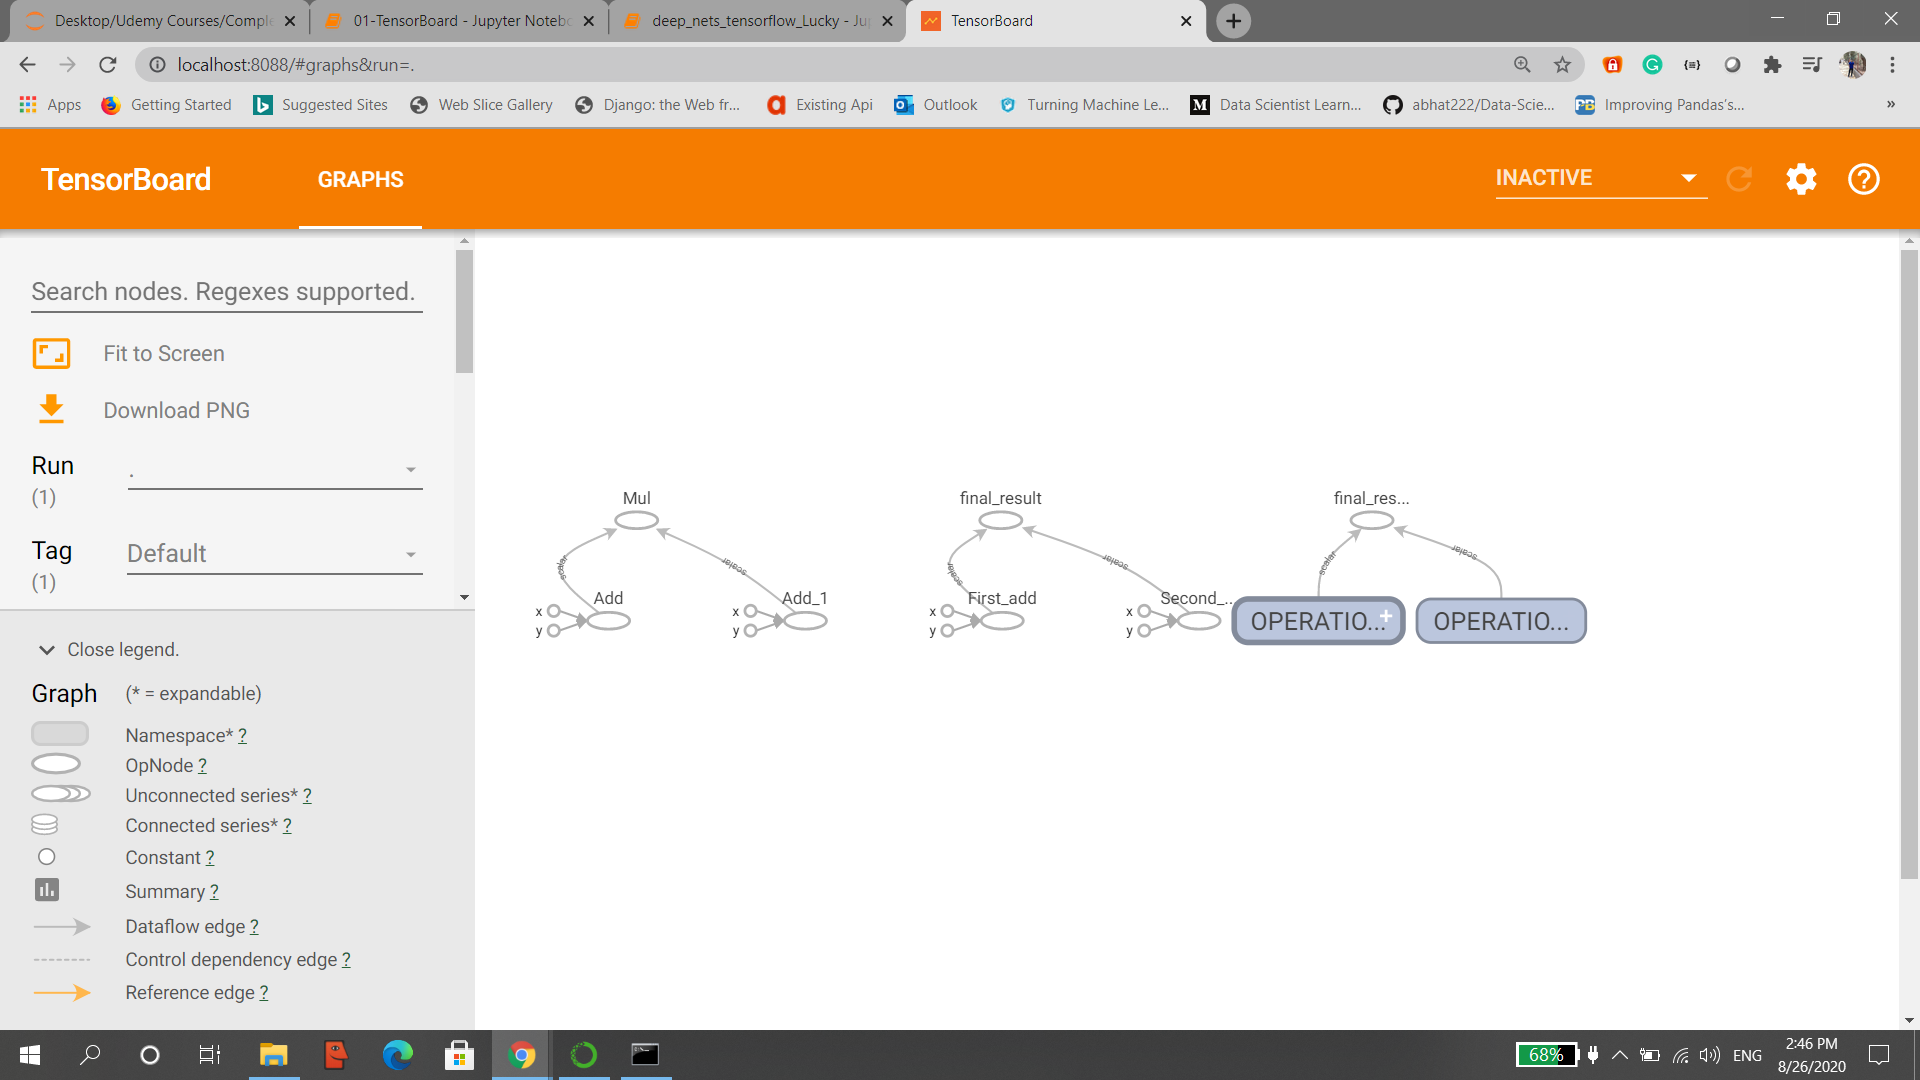

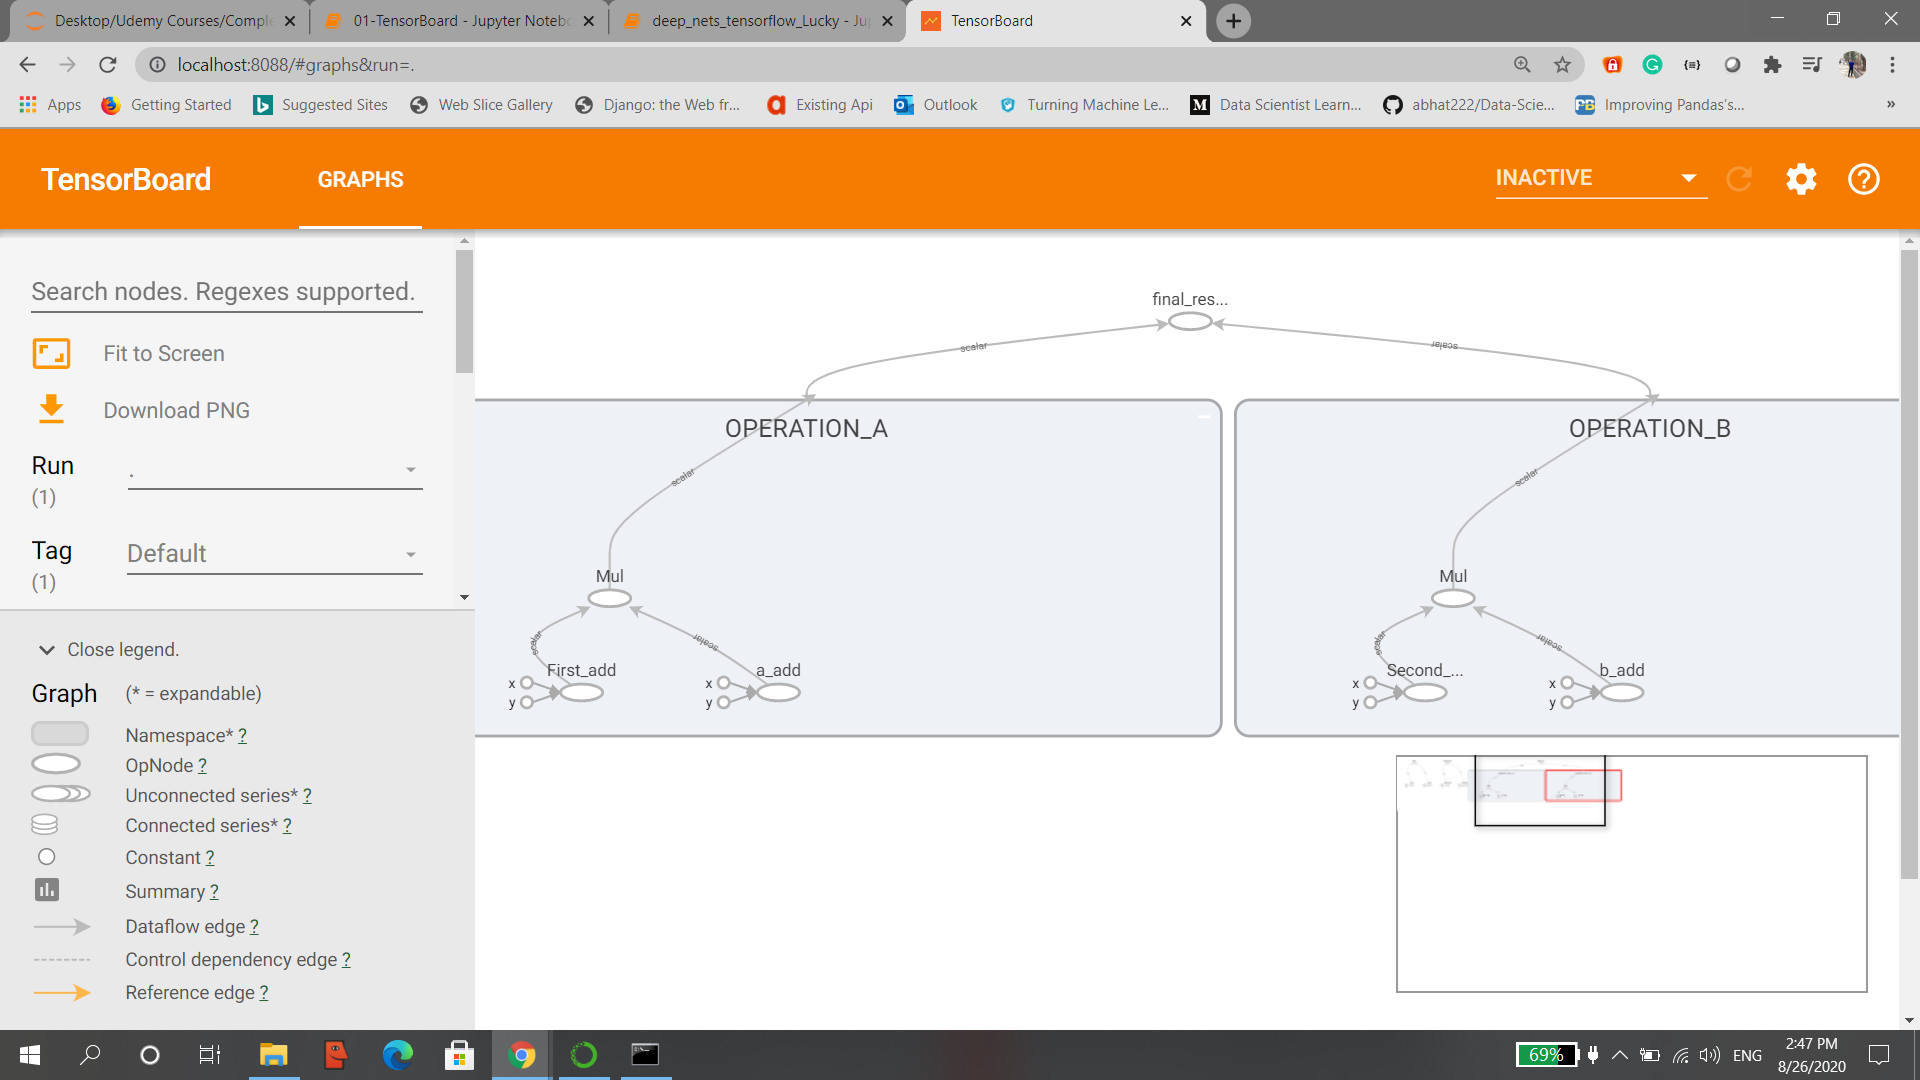

---

#### Visualizing Histogram

In [9]:
k = tf.placeholder(tf.float32)

# Make a normal distribution, with a shifting mean
mean_moving_normal = tf.random_normal(shape=[1000], mean=(5*k), stddev=1)
# Record that distribution into a histogram summary
tf.summary.histogram("normal/moving_mean", mean_moving_normal)

# Setup a session and summary writer
with tf.Session() as sess:
    writer = tf.summary.FileWriter(r"C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\Miscellaneous-Topics\tensorboard_histogram")

    summaries = tf.summary.merge_all()

    # Setup a loop and write the summaries to disk
    N = 400
    for step in range(N):
        
        k_val = step/float(N)
        summ = sess.run(summaries, feed_dict={k: k_val})
        writer.add_summary(summ, global_step=step)
        
    writer.close()

#### Now you need to run the file stored in 'tensorboard_histogram' with cmd

1.cd to the Path where the 'tensorboard_output' is located
2.Run Following command

    tensorboard --logdir="./tensorboard_histogram"
    
    or
    
    tensorboard --logdir="./tensorboard_histogram" --host localhost --port 8088
    
3.Copy the Path and Run it on Browser

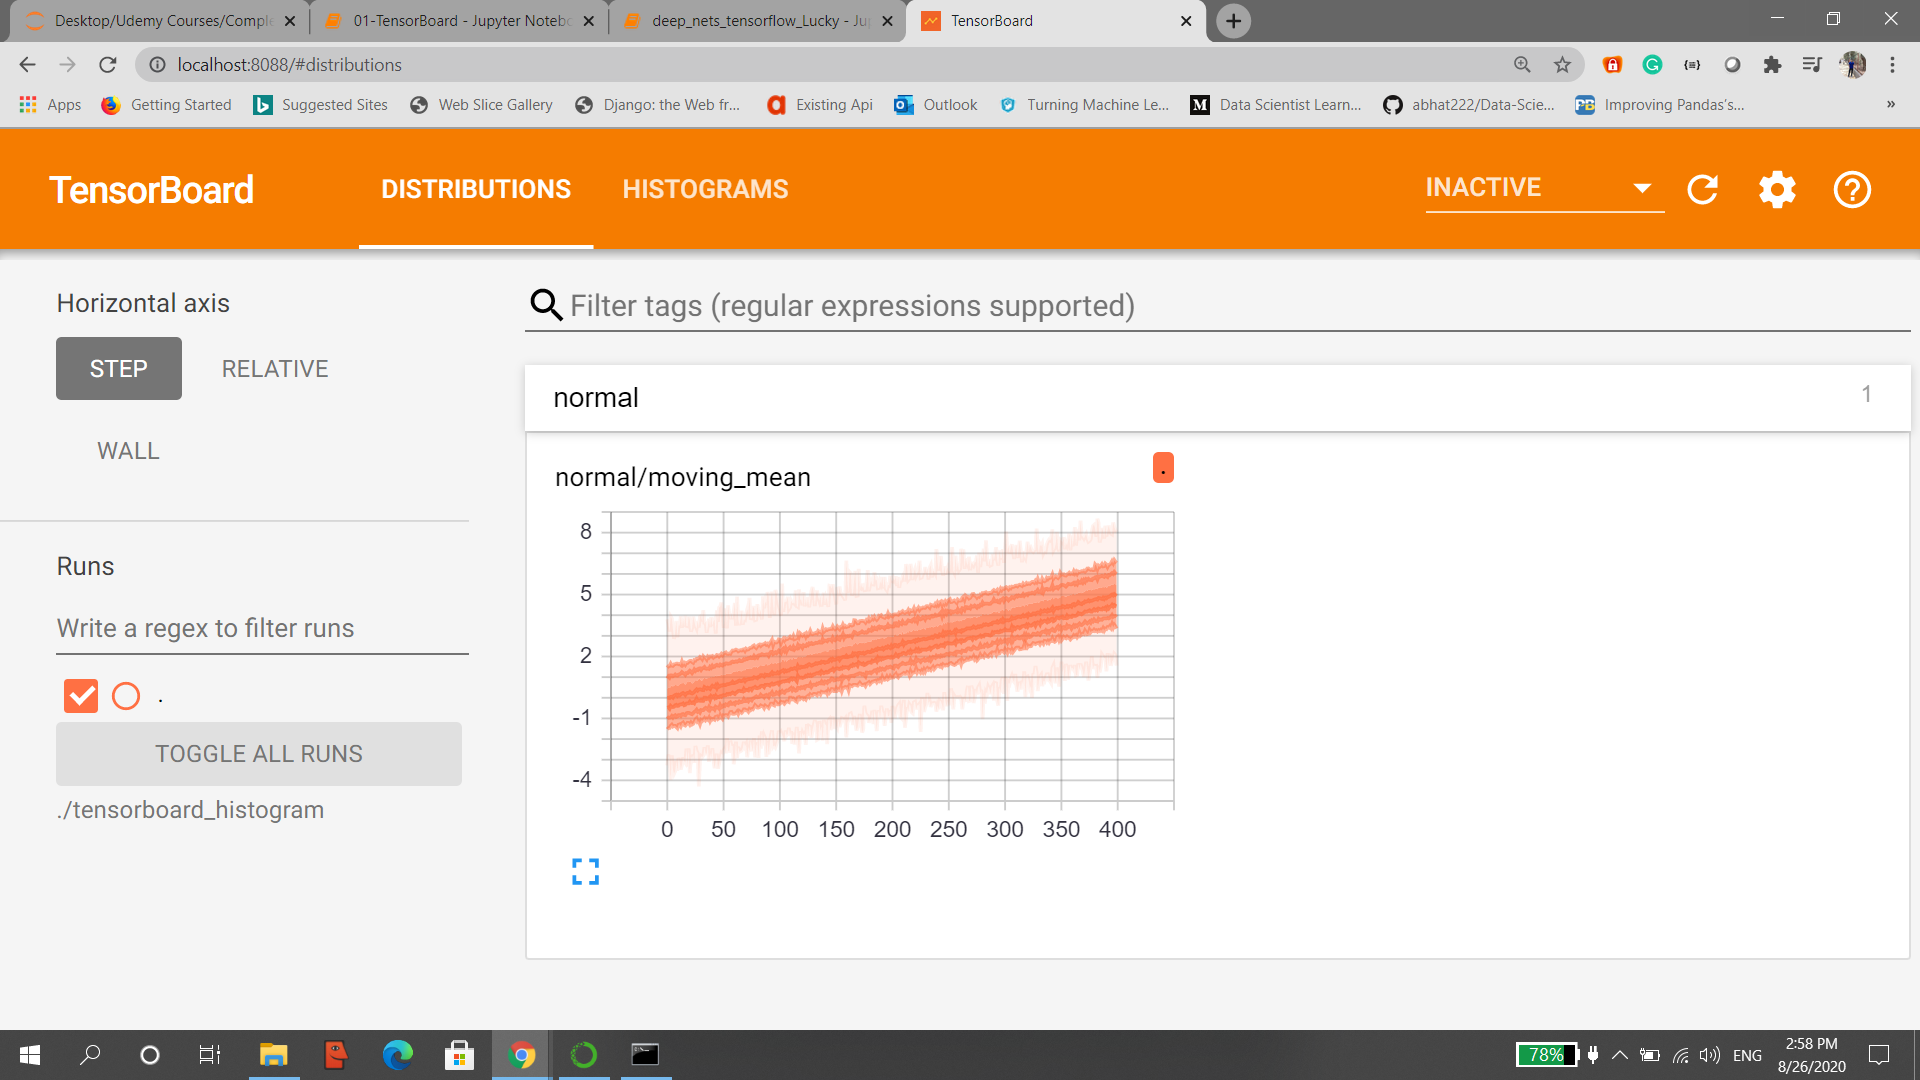

### Usefull for Visualization of Weights

#### Histogram

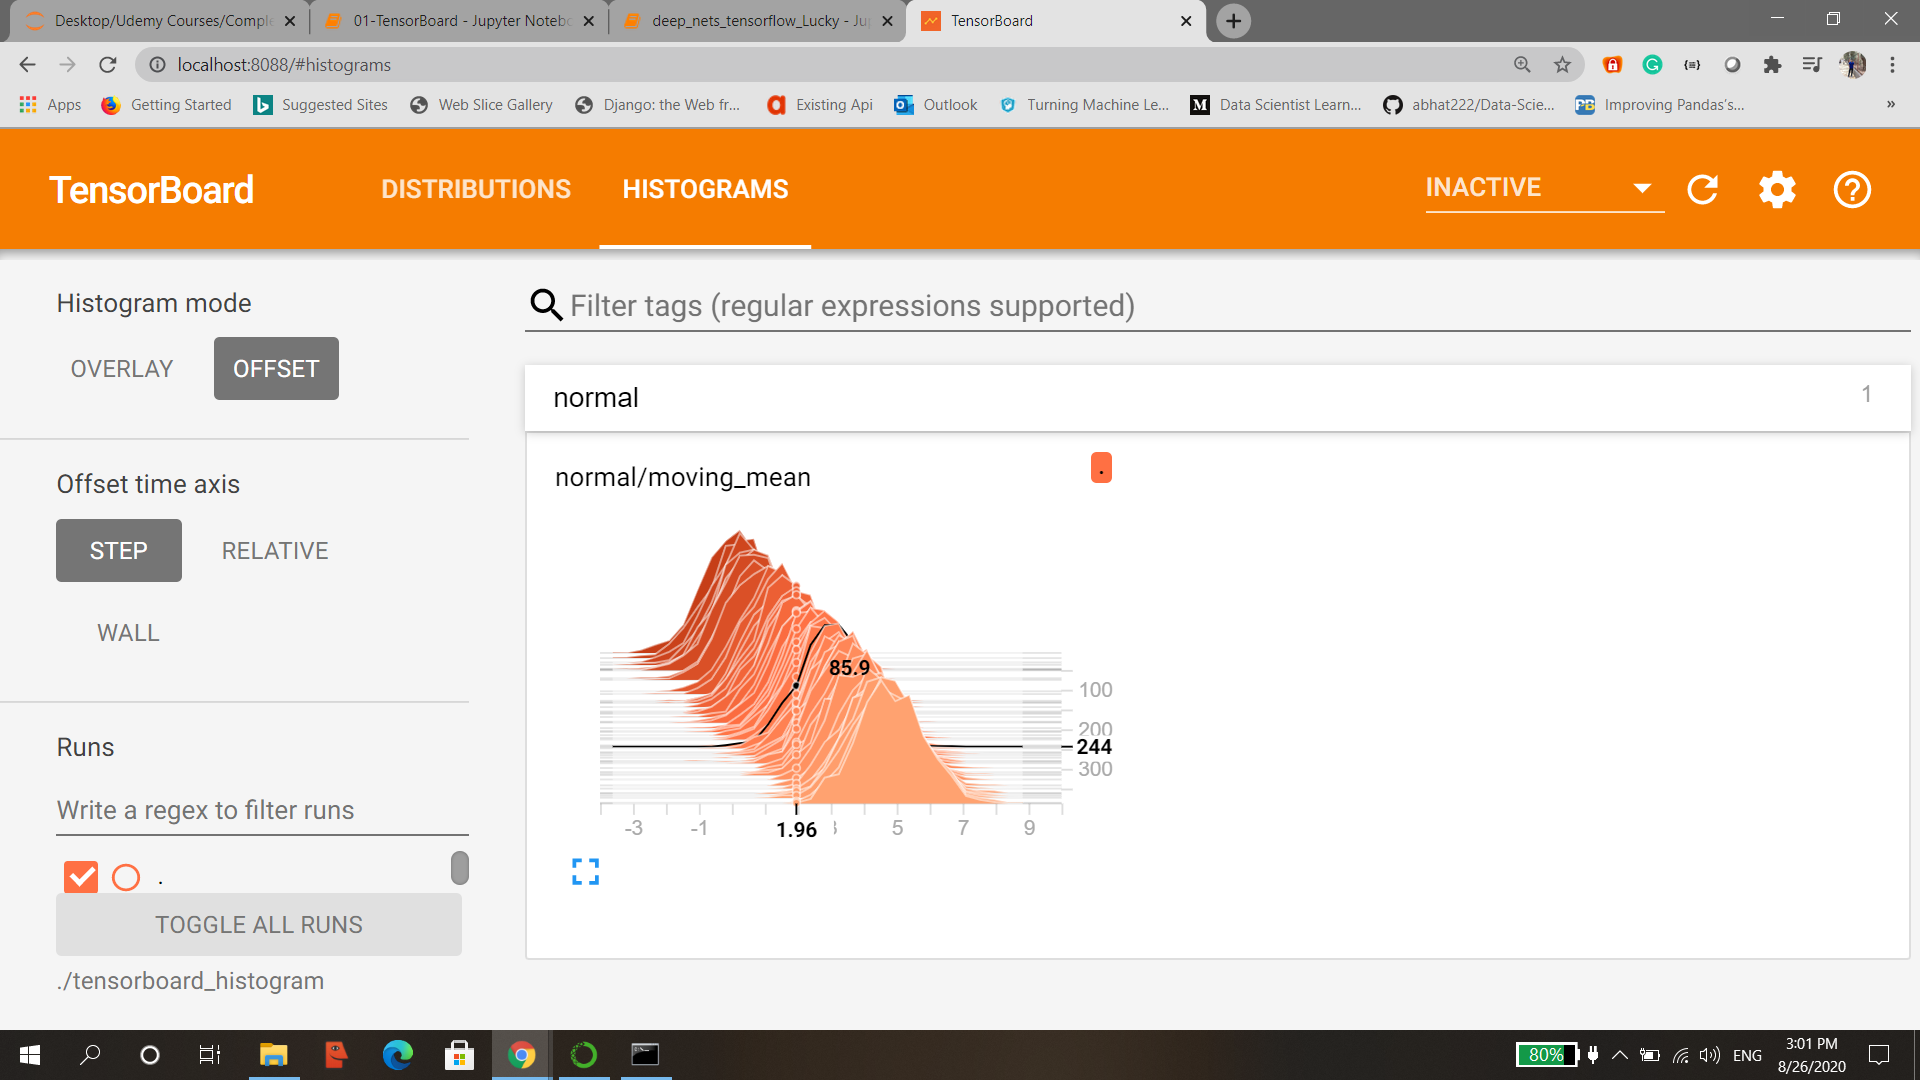